# Correlation and Diversification: The Power of Combining Assets

**Time:** 18 minutes

**Prerequisites:** 04_returns_and_performance.ipynb, 06_maximum_drawdown.ipynb

---

You've heard "don't put all your eggs in one basket." Correlation explains **why** this works mathematically, and diversification shows **how** to build portfolios that reduce risk without sacrificing returns.

## What is Correlation?

**Correlation** measures how two assets move together.

**Correlation Formula (Pearson's r):**

$$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$

Where:
- $\text{Cov}(X, Y)$ = Covariance of X and Y
- $\sigma_X$ = Standard deviation of X
- $\sigma_Y$ = Standard deviation of Y

**Correlation Values:**

| Value | Meaning | Example |
|-------|---------|--------|
| +1.0 | Perfect positive | Move exactly together |
| +0.7 | Strong positive | Usually move same direction |
| +0.3 | Weak positive | Slight tendency to move together |
| 0.0 | No correlation | Independent movements |
| -0.3 | Weak negative | Slight tendency to move opposite |
| -0.7 | Strong negative | Usually move opposite |
| -1.0 | Perfect negative | Always move opposite |

Warning: Correlation measures linear relationships and can change dramatically during market stress. Assets that seem uncorrelated in calm markets often become highly correlated during crashes — precisely when you need diversification most.


In [1]:
# Install required packages
!pip install -q yfinance pandas numpy matplotlib seaborn

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_returns(ticker, period="2y"):
    """Get daily returns for a ticker."""
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)
    returns = hist['Close'].pct_change().dropna()
    return returns

def calculate_correlation(ticker1, ticker2, period="2y"):
    """Calculate correlation between two stocks.

    Args:
        ticker1: First stock symbol
        ticker2: Second stock symbol
        period: Historical period

    Returns:
        Correlation coefficient and supporting data
    """
    returns1 = get_returns(ticker1, period)
    returns2 = get_returns(ticker2, period)

    # Align the series (matching dates)
    combined = pd.DataFrame({
        ticker1: returns1,
        ticker2: returns2
    }).dropna()

    correlation = combined[ticker1].corr(combined[ticker2])

    return {
        'correlation': correlation,
        'returns1': combined[ticker1],
        'returns2': combined[ticker2],
        'n_observations': len(combined)
    }

# Example: Calculate correlation between Apple and Microsoft
result = calculate_correlation("AAPL", "MSFT")

print("Correlation Analysis: AAPL vs MSFT")
print("=" * 45)
print(f"Correlation: {result['correlation']:.3f}")
print(f"Observations: {result['n_observations']} days")
print(f"\nInterpretation: ", end="")

corr = result['correlation']
if corr > 0.7:
    print(f"Strong positive correlation ({corr:.2f})")
    print("These stocks tend to move together.")
elif corr > 0.3:
    print(f"Moderate positive correlation ({corr:.2f})")
    print("Some tendency to move together.")
elif corr > -0.3:
    print(f"Weak/No correlation ({corr:.2f})")
    print("Movements are largely independent.")
elif corr > -0.7:
    print(f"Moderate negative correlation ({corr:.2f})")
    print("Some tendency to move opposite.")
else:
    print(f"Strong negative correlation ({corr:.2f})")
    print("These stocks tend to move opposite.")

Correlation Analysis: AAPL vs MSFT
Correlation: 0.435
Observations: 499 days

Interpretation: Moderate positive correlation (0.43)
Some tendency to move together.


## Visualizing Correlation

Scatter plots make correlation intuitive.

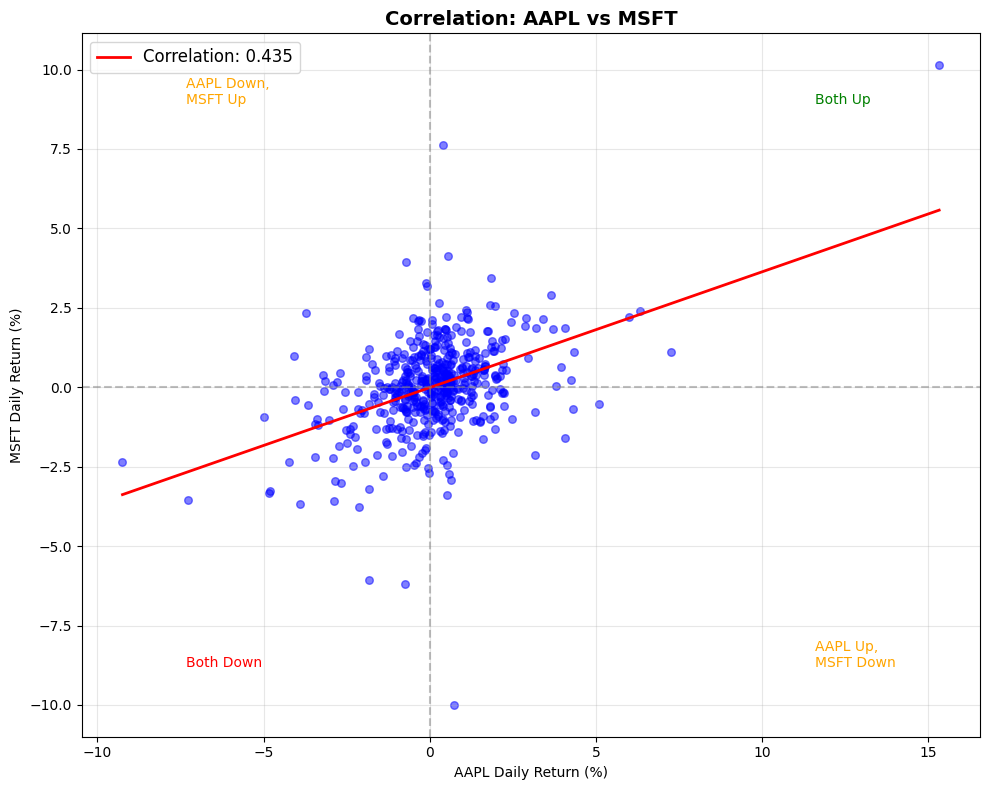

In [3]:
def plot_correlation_scatter(ticker1, ticker2, period="2y"):
    """Create a scatter plot showing correlation between two stocks."""
    result = calculate_correlation(ticker1, ticker2, period)

    fig, ax = plt.subplots(figsize=(10, 8))

    # Scatter plot
    ax.scatter(result['returns1'] * 100, result['returns2'] * 100,
               alpha=0.5, color='blue', s=30)

    # Add regression line
    z = np.polyfit(result['returns1'], result['returns2'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(result['returns1'].min(), result['returns1'].max(), 100)
    ax.plot(x_line * 100, p(x_line) * 100, 'r-', linewidth=2,
            label=f'Correlation: {result["correlation"]:.3f}')

    # Add quadrant lines
    ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(0, color='gray', linestyle='--', alpha=0.5)

    ax.set_xlabel(f'{ticker1} Daily Return (%)')
    ax.set_ylabel(f'{ticker2} Daily Return (%)')
    ax.set_title(f'Correlation: {ticker1} vs {ticker2}', fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', fontsize=12)
    ax.grid(True, alpha=0.3)

    # Add quadrant labels
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(xlim[1]*0.7, ylim[1]*0.8, 'Both Up', fontsize=10, color='green')
    ax.text(xlim[0]*0.7, ylim[0]*0.8, 'Both Down', fontsize=10, color='red')
    ax.text(xlim[1]*0.7, ylim[0]*0.8, f'{ticker1} Up,\n{ticker2} Down', fontsize=10, color='orange')
    ax.text(xlim[0]*0.7, ylim[1]*0.8, f'{ticker1} Down,\n{ticker2} Up', fontsize=10, color='orange')

    plt.tight_layout()
    plt.show()

    return result

# Visualize correlation
result = plot_correlation_scatter("AAPL", "MSFT")

## Correlation Matrix: Multiple Assets

When building a portfolio, you need to understand how ALL assets relate to each other.

In [4]:
def build_correlation_matrix(tickers, period="2y"):
    """Build correlation matrix for multiple assets.

    Args:
        tickers: List of stock symbols
        period: Historical period

    Returns:
        Correlation matrix as DataFrame
    """
    # Get returns for all tickers
    returns_dict = {}
    for ticker in tickers:
        try:
            returns_dict[ticker] = get_returns(ticker, period)
        except Exception as e:
            print(f"Error getting {ticker}: {e}")

    # Combine into DataFrame
    returns_df = pd.DataFrame(returns_dict).dropna()

    # Calculate correlation matrix
    corr_matrix = returns_df.corr()

    return corr_matrix, returns_df

# Build correlation matrix for a diverse set of assets
tickers = ["AAPL", "MSFT", "GOOGL", "NVDA", "JPM", "XOM", "GLD", "TLT"]
corr_matrix, returns_df = build_correlation_matrix(tickers)

print("Correlation Matrix")
print("=" * 80)
print(corr_matrix.round(2).to_string())

Correlation Matrix
       AAPL  MSFT  GOOGL  NVDA   JPM   XOM   GLD   TLT
AAPL   1.00  0.43   0.44  0.34  0.31  0.23  0.01  0.09
MSFT   0.43  1.00   0.43  0.51  0.30  0.02  0.04 -0.01
GOOGL  0.44  0.43   1.00  0.40  0.29  0.06  0.09 -0.01
NVDA   0.34  0.51   0.40  1.00  0.27  0.05  0.05 -0.04
JPM    0.31  0.30   0.29  0.27  1.00  0.31  0.01 -0.12
XOM    0.23  0.02   0.06  0.05  0.31  1.00  0.10 -0.02
GLD    0.01  0.04   0.09  0.05  0.01  0.10  1.00  0.10
TLT    0.09 -0.01  -0.01 -0.04 -0.12 -0.02  0.10  1.00


## Visualizing the Correlation Matrix

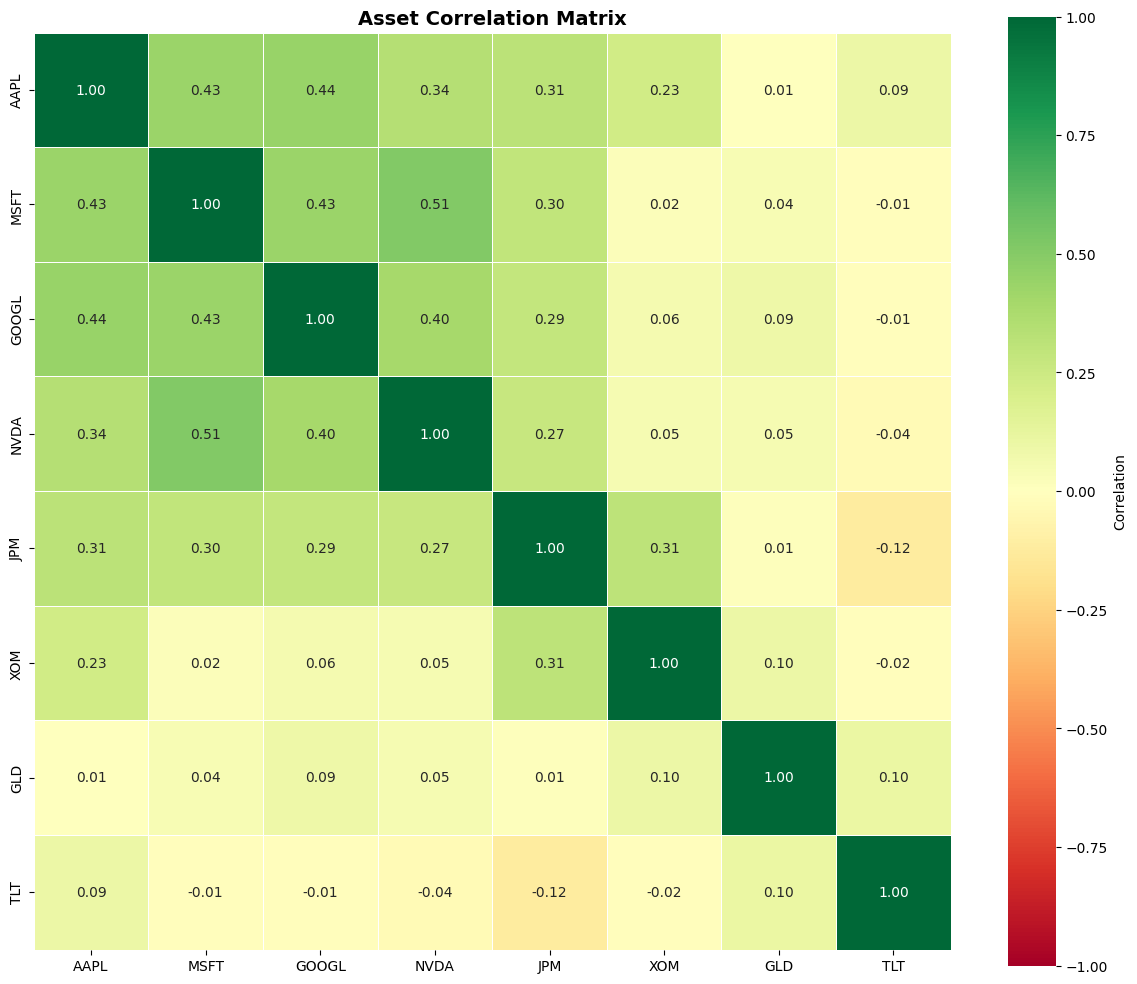


Best Diversification Pairs (Lowest Correlations):
--------------------------------------------------
JPM - TLT: -0.124
NVDA - TLT: -0.039
XOM - TLT: -0.015
MSFT - TLT: -0.012
GOOGL - TLT: -0.009


In [5]:
def plot_correlation_heatmap(corr_matrix):
    """Create a heatmap visualization of correlation matrix."""
    fig, ax = plt.subplots(figsize=(12, 10))

    # Create heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # Upper triangle mask

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',
                center=0, vmin=-1, vmax=1,
                square=True, linewidths=0.5,
                cbar_kws={'label': 'Correlation'},
                ax=ax)

    ax.set_title('Asset Correlation Matrix', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(corr_matrix)

# Identify lowest correlations (best for diversification)
print("\nBest Diversification Pairs (Lowest Correlations):")
print("-" * 50)

# Get all pairs
pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        ticker1 = corr_matrix.columns[i]
        ticker2 = corr_matrix.columns[j]
        pairs.append((ticker1, ticker2, corr_matrix.iloc[i, j]))

# Sort by correlation (lowest first)
pairs.sort(key=lambda x: x[2])

for t1, t2, corr in pairs[:5]:
    print(f"{t1} - {t2}: {corr:.3f}")

## Why Correlation Matters: The Math of Diversification

**Portfolio Variance Formula (2 assets):**

$$\sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_1 \sigma_2 \rho_{1,2}$$

Where:
- $w_i$ = Weight of asset i
- $\sigma_i$ = Standard deviation of asset i
- $\rho_{1,2}$ = Correlation between assets

**Key Insight:** The correlation term ($\rho$) determines whether combining assets reduces risk.

| If correlation is... | Portfolio risk is... |
|----------------------|----------------------|
| +1.0 (perfect positive) | Weighted average (no benefit) |
| < 1.0 (less than perfect) | **Lower** than weighted average |
| 0.0 (uncorrelated) | Significantly reduced |
| -1.0 (perfect negative) | Can be **zero** with right weights |

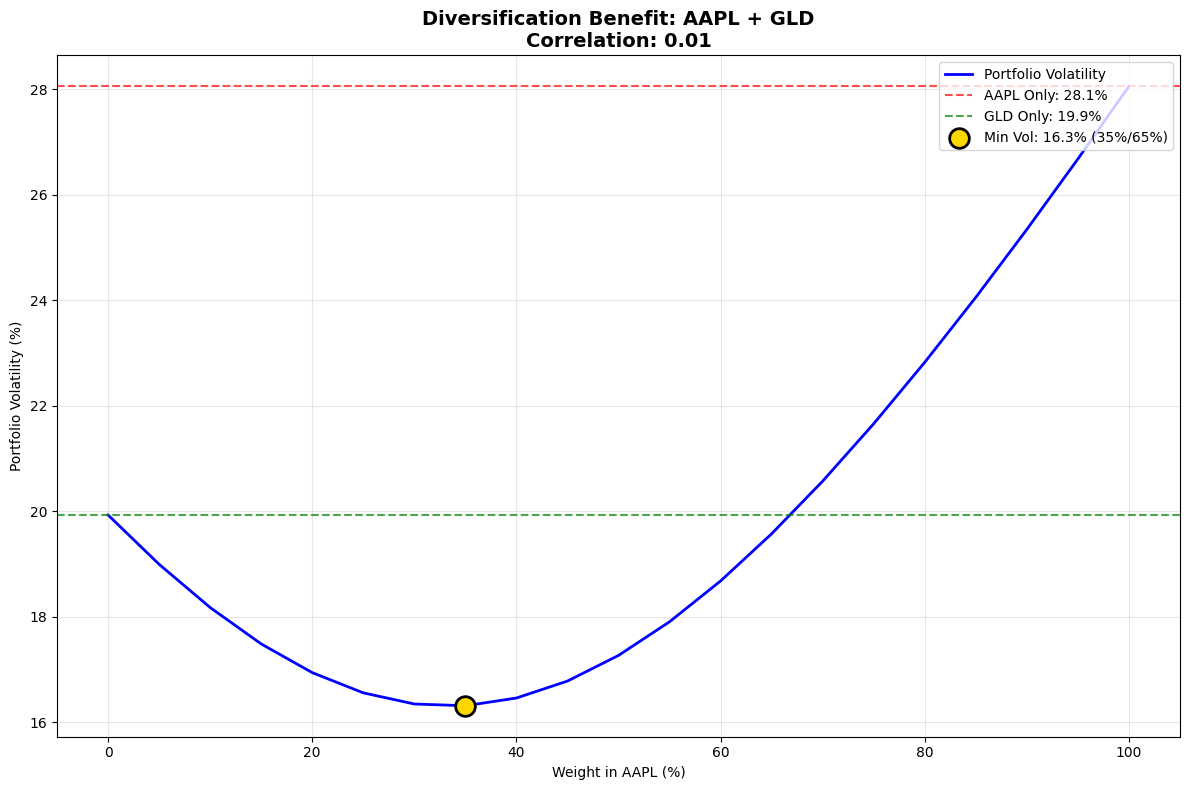

Diversification Analysis
AAPL Volatility: 28.1%
GLD Volatility: 19.9%
Correlation: 0.007

Minimum Volatility Portfolio:
  AAPL: 35%
  GLD: 65%
  Portfolio Volatility: 16.3%

Diversification Benefit: 7.7% lower than average


In [6]:
def demonstrate_diversification_benefit(ticker1, ticker2, period="2y"):
    """Show how combining two assets can reduce portfolio risk."""
    returns1 = get_returns(ticker1, period)
    returns2 = get_returns(ticker2, period)

    # Align returns
    combined = pd.DataFrame({ticker1: returns1, ticker2: returns2}).dropna()

    # Calculate individual stats
    vol1 = combined[ticker1].std() * np.sqrt(252) * 100  # Annualized
    vol2 = combined[ticker2].std() * np.sqrt(252) * 100
    corr = combined[ticker1].corr(combined[ticker2])

    # Calculate portfolio volatility at different weights
    weights = np.arange(0, 1.01, 0.05)
    portfolio_vols = []

    for w1 in weights:
        w2 = 1 - w1
        # Portfolio variance formula
        var_p = (w1**2 * (vol1/100)**2 +
                 w2**2 * (vol2/100)**2 +
                 2 * w1 * w2 * (vol1/100) * (vol2/100) * corr)
        vol_p = np.sqrt(var_p) * 100
        portfolio_vols.append(vol_p)

    # Find minimum volatility portfolio
    min_vol_idx = np.argmin(portfolio_vols)
    min_vol = portfolio_vols[min_vol_idx]
    optimal_w1 = weights[min_vol_idx]

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(weights * 100, portfolio_vols, 'b-', linewidth=2, label='Portfolio Volatility')
    ax.axhline(vol1, color='red', linestyle='--', alpha=0.7, label=f'{ticker1} Only: {vol1:.1f}%')
    ax.axhline(vol2, color='green', linestyle='--', alpha=0.7, label=f'{ticker2} Only: {vol2:.1f}%')

    # Mark minimum
    ax.scatter([optimal_w1 * 100], [min_vol], color='gold', s=200, zorder=5,
               edgecolor='black', linewidth=2, label=f'Min Vol: {min_vol:.1f}% ({optimal_w1*100:.0f}%/{(1-optimal_w1)*100:.0f}%)')

    ax.set_xlabel(f'Weight in {ticker1} (%)')
    ax.set_ylabel('Portfolio Volatility (%)')
    ax.set_title(f'Diversification Benefit: {ticker1} + {ticker2}\nCorrelation: {corr:.2f}',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Summary
    print("Diversification Analysis")
    print("=" * 50)
    print(f"{ticker1} Volatility: {vol1:.1f}%")
    print(f"{ticker2} Volatility: {vol2:.1f}%")
    print(f"Correlation: {corr:.3f}")
    print(f"\nMinimum Volatility Portfolio:")
    print(f"  {ticker1}: {optimal_w1*100:.0f}%")
    print(f"  {ticker2}: {(1-optimal_w1)*100:.0f}%")
    print(f"  Portfolio Volatility: {min_vol:.1f}%")

    simple_avg_vol = (vol1 + vol2) / 2
    benefit = simple_avg_vol - min_vol
    print(f"\nDiversification Benefit: {benefit:.1f}% lower than average")

# Demonstrate with tech + gold (typically low correlation)
demonstrate_diversification_benefit("AAPL", "GLD")

## Rolling Correlation: Correlation Changes Over Time

Correlation isn't static—it can increase during market stress!

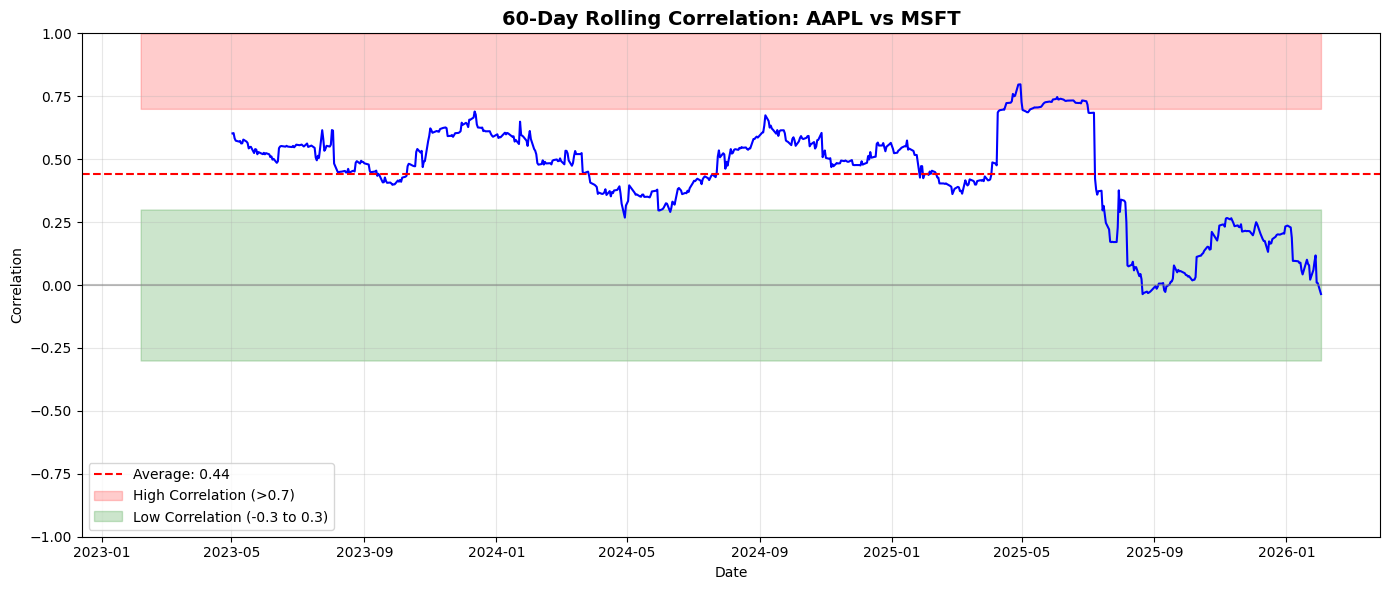


Rolling Correlation Statistics (60-day window)
--------------------------------------------------
Average:  0.441
Std Dev:  0.189
Min:      -0.036
Max:      0.797


In [7]:
def plot_rolling_correlation(ticker1, ticker2, period="3y", window=60):
    """Plot rolling correlation over time.

    Args:
        ticker1, ticker2: Stock symbols
        period: Total historical period
        window: Rolling window in days (default 60 = ~3 months)
    """
    returns1 = get_returns(ticker1, period)
    returns2 = get_returns(ticker2, period)

    # Align returns
    combined = pd.DataFrame({ticker1: returns1, ticker2: returns2}).dropna()

    # Calculate rolling correlation
    rolling_corr = combined[ticker1].rolling(window=window).corr(combined[ticker2])

    # Plot
    fig, ax = plt.subplots(figsize=(14, 6))

    ax.plot(rolling_corr.index, rolling_corr, 'b-', linewidth=1.5)
    ax.axhline(rolling_corr.mean(), color='red', linestyle='--',
               label=f'Average: {rolling_corr.mean():.2f}')
    ax.axhline(0, color='gray', linestyle='-', alpha=0.5)

    # Shade high correlation zones
    ax.fill_between(rolling_corr.index, 0.7, 1.0, alpha=0.2, color='red', label='High Correlation (>0.7)')
    ax.fill_between(rolling_corr.index, -0.3, 0.3, alpha=0.2, color='green', label='Low Correlation (-0.3 to 0.3)')

    ax.set_xlabel('Date')
    ax.set_ylabel('Correlation')
    ax.set_title(f'{window}-Day Rolling Correlation: {ticker1} vs {ticker2}', fontsize=14, fontweight='bold')
    ax.set_ylim(-1, 1)
    ax.legend(loc='lower left')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Statistics
    print(f"\nRolling Correlation Statistics ({window}-day window)")
    print("-" * 50)
    print(f"Average:  {rolling_corr.mean():.3f}")
    print(f"Std Dev:  {rolling_corr.std():.3f}")
    print(f"Min:      {rolling_corr.min():.3f}")
    print(f"Max:      {rolling_corr.max():.3f}")

    return rolling_corr

# Check how AAPL-MSFT correlation changes over time
rolling_corr = plot_rolling_correlation("AAPL", "MSFT", window=60)

## Diversification in Practice: Building a Diversified Portfolio

A truly diversified portfolio includes assets with **low correlation to each other**, not just different names.

In [8]:
def analyze_portfolio_diversification(holdings, period="2y"):
    """Analyze diversification quality of a portfolio.

    Args:
        holdings: Dict of {ticker: weight}
        period: Historical period
    """
    tickers = list(holdings.keys())

    # Get correlation matrix
    corr_matrix, returns_df = build_correlation_matrix(tickers, period)

    # Calculate average pairwise correlation
    n = len(tickers)
    total_corr = 0
    pairs = 0
    for i in range(n):
        for j in range(i+1, n):
            total_corr += corr_matrix.iloc[i, j]
            pairs += 1
    avg_corr = total_corr / pairs if pairs > 0 else 0

    # Calculate portfolio volatility
    weights = np.array([holdings[t] for t in tickers])
    cov_matrix = returns_df.cov() * 252  # Annualized
    port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    port_vol = np.sqrt(port_var) * 100

    # Calculate weighted average individual volatility
    individual_vols = returns_df.std() * np.sqrt(252) * 100
    weighted_avg_vol = sum(holdings[t] * individual_vols[t] for t in tickers)

    # Diversification ratio
    div_ratio = weighted_avg_vol / port_vol if port_vol > 0 else 1

    print("Portfolio Diversification Analysis")
    print("=" * 55)
    print(f"\nHoldings:")
    for ticker, weight in holdings.items():
        vol = individual_vols[ticker]
        print(f"  {ticker}: {weight*100:5.1f}% (Vol: {vol:.1f}%)")

    print(f"\nCorrelation Analysis:")
    print(f"  Average Pairwise Correlation: {avg_corr:.3f}")

    if avg_corr > 0.7:
        print(f"  → HIGH correlation - limited diversification benefit")
    elif avg_corr > 0.4:
        print(f"  → MODERATE correlation - some diversification benefit")
    else:
        print(f"  → LOW correlation - good diversification")

    print(f"\nVolatility Analysis:")
    print(f"  Weighted Avg Individual Vol: {weighted_avg_vol:.1f}%")
    print(f"  Actual Portfolio Vol:        {port_vol:.1f}%")
    print(f"  Diversification Benefit:     {weighted_avg_vol - port_vol:.1f}% reduction")
    print(f"  Diversification Ratio:       {div_ratio:.2f}x")

    return {
        'avg_correlation': avg_corr,
        'portfolio_vol': port_vol,
        'weighted_avg_vol': weighted_avg_vol,
        'diversification_ratio': div_ratio,
        'corr_matrix': corr_matrix
    }

# Example 1: Poorly diversified (all tech)
print("\n" + "="*60)
print("PORTFOLIO 1: Tech-Heavy (Poor Diversification)")
print("="*60)
tech_portfolio = {
    'AAPL': 0.25,
    'MSFT': 0.25,
    'GOOGL': 0.25,
    'NVDA': 0.25
}
result1 = analyze_portfolio_diversification(tech_portfolio)

# Example 2: Well diversified (different asset classes)
print("\n" + "="*60)
print("PORTFOLIO 2: Multi-Asset (Better Diversification)")
print("="*60)
diversified_portfolio = {
    'AAPL': 0.20,   # Tech
    'JPM': 0.20,    # Financials
    'XOM': 0.20,    # Energy
    'GLD': 0.20,    # Gold
    'TLT': 0.20     # Bonds
}
result2 = analyze_portfolio_diversification(diversified_portfolio)


PORTFOLIO 1: Tech-Heavy (Poor Diversification)
Portfolio Diversification Analysis

Holdings:
  AAPL:  25.0% (Vol: 28.1%)
  MSFT:  25.0% (Vol: 23.5%)
  GOOGL:  25.0% (Vol: 29.8%)
  NVDA:  25.0% (Vol: 50.8%)

Correlation Analysis:
  Average Pairwise Correlation: 0.426
  → MODERATE correlation - some diversification benefit

Volatility Analysis:
  Weighted Avg Individual Vol: 33.1%
  Actual Portfolio Vol:        25.2%
  Diversification Benefit:     7.9% reduction
  Diversification Ratio:       1.31x

PORTFOLIO 2: Multi-Asset (Better Diversification)
Portfolio Diversification Analysis

Holdings:
  AAPL:  20.0% (Vol: 28.1%)
  JPM:  20.0% (Vol: 24.6%)
  XOM:  20.0% (Vol: 21.9%)
  GLD:  20.0% (Vol: 19.9%)
  TLT:  20.0% (Vol: 12.7%)

Correlation Analysis:
  Average Pairwise Correlation: 0.102
  → LOW correlation - good diversification

Volatility Analysis:
  Weighted Avg Individual Vol: 21.4%
  Actual Portfolio Vol:        12.0%
  Diversification Benefit:     9.4% reduction
  Diversification 

## Correlation During Crises

**Warning:** Correlations tend to increase during market crashes—exactly when you need diversification most!

This is called **correlation breakdown** or **contagion**.

In [10]:
def analyze_correlation_regimes(tickers, period="5y", threshold=-0.02):
    """Compare correlations during normal vs. stressed markets.

    Args:
        tickers: List of ticker symbols
        period: Historical period
        threshold: Daily return below this = "stressed" day
    """
    # Get SPY as market indicator
    spy_returns = get_returns("SPY", period)

    # Get returns for all tickers
    returns_dict = {ticker: get_returns(ticker, period) for ticker in tickers}
    returns_df = pd.DataFrame(returns_dict).dropna()

    # Align with SPY
    combined = pd.concat([returns_df, spy_returns.rename('SPY')], axis=1).dropna()

    # Split into normal vs stressed days
    stressed_mask = combined['SPY'] < threshold
    normal_days = combined[~stressed_mask][tickers]
    stressed_days = combined[stressed_mask][tickers]

    # Calculate correlations for each regime
    corr_normal = normal_days.corr()
    corr_stressed = stressed_days.corr()

    print("Correlation Regime Analysis")
    print("=" * 60)
    print(f"Normal Days: {len(normal_days)} ({len(normal_days)/len(combined)*100:.1f}%)")
    print(f"Stressed Days (SPY < {threshold*100:.0f}%): {len(stressed_days)} ({len(stressed_days)/len(combined)*100:.1f}%)")

    # Calculate average correlations
    n = len(tickers)
    avg_normal = sum(corr_normal.iloc[i, j] for i in range(n) for j in range(i+1, n)) / (n*(n-1)/2)
    avg_stressed = sum(corr_stressed.iloc[i, j] for i in range(n) for j in range(i+1, n)) / (n*(n-1)/2)

    print(f"\nAverage Pairwise Correlation:")
    print(f"  Normal Days:   {avg_normal:.3f}")
    print(f"  Stressed Days: {avg_stressed:.3f}")
    print(f"  Change:        {avg_stressed - avg_normal:+.3f}")

    if avg_stressed > avg_normal:
        print(f"\n⚠️  Correlations INCREASE during stress!")
        print(f"    Diversification benefit is REDUCED when you need it most.")

    return {
        'corr_normal': corr_normal,
        'corr_stressed': corr_stressed,
        'avg_normal': avg_normal,
        'avg_stressed': avg_stressed
    }

# Analyze correlation regimes
regime_analysis = analyze_correlation_regimes(["AAPL", "MSFT", "JPM", "XOM", "GLD"])

Correlation Regime Analysis
Normal Days: 1213 (96.7%)
Stressed Days (SPY < -2%): 41 (3.3%)

Average Pairwise Correlation:
  Normal Days:   0.170
  Stressed Days: 0.245
  Change:        +0.074

⚠️  Correlations INCREASE during stress!
    Diversification benefit is REDUCED when you need it most.


## Key Takeaways

### Formulas You've Learned:

1. **Correlation** = Cov(X,Y) / (σ_X × σ_Y)

2. **Portfolio Variance** = w₁²σ₁² + w₂²σ₂² + 2w₁w₂σ₁σ₂ρ

3. **Diversification Ratio** = Weighted Avg Vol / Portfolio Vol

### Key Concepts:

- **Correlation ranges from -1 to +1**: Lower is better for diversification
- **Diversification only works with <100% correlation**: The lower the correlation, the bigger the benefit
- **Correlation is not static**: It can change over time and tends to increase during crises
- **Sector concentration = hidden correlation**: All tech stocks tend to move together

### Why This Matters for AI Agents:

When we build AI agents, they'll need to:
- Calculate and monitor correlation matrices
- Identify diversification opportunities
- Alert when correlations are spiking (potential crisis)
- Suggest portfolio adjustments to improve diversification

**Next Notebook:** We'll learn about the Sortino Ratio - a risk metric that focuses specifically on downside volatility.